# Scikit-Learn의 데이터 표현방식
- scikit-learn은 데이터를 담고있는 2차원 구조의 특징행렬(X)과 레이블을 담고 있는 1차원 구조의 target(y)를 사용하도록 설계
- scikit-learn의 Estimator는 공통 인터페이스로 fit, predict, score 메서드 제공
- 회기 -> 선형 알고리즘 LinearRegressor를 사용
- 분류 -> 분류 알고리즘 KNeighborsClassifier 사용
- scikit-learn의 train, test,split 함수를 이용해 훈련데이터와 테스트데이터를 나누고, 모델의 성능은 테스트데이터를 이용해 측정

In [47]:
# - seaborn : matplotlib 라이브러리의 플러그인 역활
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset("iris")
iris.info()
# 입력값:0~3까지 인덱스 데이터, 결과값 4번 인덱스 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Feature Matrix 와 target vector를 추출하는 작업
X = iris.drop("species", axis=1) #species 열(칼럼) 삭제
X.shape

(150, 4)

In [5]:
y = iris["species"]
y.shape

(150,)

In [6]:
from sklearn.datasets import load_iris
# Bunch 객체를 이용한 틍징행렬(X), 대상벡터(y) 생성
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [7]:
iris.keys()
# data : x에 해당하는 특징행렬
# target : y에 해당하는 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
#target y를 제외한 컬럼 네임 생성 
iris.feature_names, iris.data[:5]

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]))

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
X = iris.data
y = iris.target

# ScikitLearn Estimator
- 추정기 라고도 불림
- fit() :정확도

In [11]:
rs = np.random.RandomState(10)
x = 10 * rs.rand(100)

In [12]:
y = 3 * x + 2 * rs.rand(100)

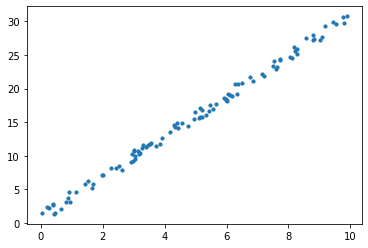

In [13]:
plt.scatter(x,y,s=10)

In [14]:
from sklearn.linear_model import LinearRegression #선형회기
regr = LinearRegression()
from sklearn.linear_model import LinearRegression #선형회기
regr = LinearRegression(fit_intercept=True)

In [15]:
X = x.reshape(-1,1)

In [16]:
regr.fit(X,y)

LinearRegression()

In [17]:
regr.coef_, regr.intercept_

(array([2.9855087]), 0.9878534341975662)

In [18]:
# 새로운데이터를 이용해 예측
x_new = np.linspace(-1,11,num=100)

In [19]:
X_new=x_new.reshape(-1,1)
X_new.shape

(100, 1)

In [20]:
#예측값
y_pred = regr.predict(X_new)

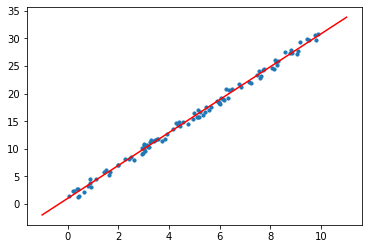

In [21]:
plt.plot(x_new,y_pred,c="red")
plt.scatter(X,y,s=10)

# 모델평가

In [22]:
# 평균,제곱의 오차
from sklearn.metrics import mean_squared_error

#y:실제값, y_pred:예측값
rmse = np.sqrt(mean_squared_error(y,y_pred))
rmse

13.70823712248633

# 훈련데이터와 테스트데이터

In [23]:
X=iris.data
y=iris.target

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred=knn.predict(X)

In [27]:
#실측값과 예측값이 같다
np.mean(y == y_pred)

1.0

# 훈련데이터와 테스트 데이터의 분리
- 모델을 만들때 사용한 데이터는 모델의 성능측정용으로 사용하지않음 : 일반화문제
- 훈련데이터 : 머신러닝 모델을 만들 목적으로 사용
- 테스트데이터 : 머신러닝 모델이 잘 작동하는지 측정할 목적
- scikit-learn의 train_test_split함수를 주로사용 (훈련용 75%, 테스트용 25%)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# test 사이즈 20퍼센트로 설정
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)

In [30]:
X_train.shape,  y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0])

In [36]:
# y_test 20%해당하는 3-건의 데이터
np.mean(y_test == y_pred)

0.9

In [37]:
knn.score(X_test,y_test)

0.9

In [38]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test, y_pred)

0.9

# 하이퍼파라미터의 선택

In [44]:
train_accuracy = []
test_accuracy = []
neighbors = range(1,11)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

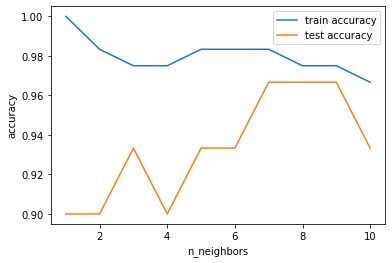

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(neighbors, train_accuracy, label="train accuracy")
plt.plot(neighbors, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()